In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from gymnasium import spaces
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from compare.simon_maml.environment import e_trajectory_simENV
from src.environments.awake_e_steering import AwakeESteering
from src.wrappers import RescaleObservation

In [3]:
old_env = e_trajectory_simENV()

new_env = AwakeESteering()
wrapped_new_env = RescaleAction(new_env, -1, 1)
wrapped_new_env = RescaleObservation(
    wrapped_new_env, -1, 1, assumed_space=spaces.Box(-1e-2, 1e-2, shape=(10,))
)

In [4]:
old_env.train = True
task = old_env.sample_tasks(1)[0]
old_env.reset_task(task)

Number of tasks: 1


In [5]:
task

{'goal': [array([[ 4.65376182e-01,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 9.38218449e-01,  4.71510438e-01,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 4.59724544e+00,  3.47224822e+00,  1.80392743e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 1.26570588e+01,  9.61203576e+00,  5.06075887e+00,
           4.10459732e-01,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           0.00000000e+00],
         [ 2.98347845e+01,  2.26931270e+01,  1.19938385e+01,
           1.35392342e+00,  7.62589963e-01,  0.00000000e+00,
           0.00000000e+00,

In [7]:
check_env(old_env)

In [8]:
check_env(wrapped_new_env)

In [9]:
old_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [10]:
new_env.action_space

Box(-0.0003, 0.0003, (10,), float32)

In [11]:
wrapped_new_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [12]:
old_env.observation_space

Box(-1.0, 1.0, (10,), float32)

In [13]:
new_env.observation_space

Box(-inf, inf, (10,), float32)

In [14]:
wrapped_new_env.observation_space

Box(-inf, inf, (10,), float32)

In [15]:
old_env.reset()

(array([ 0.00206514,  0.00181845, -0.02015566, -0.0690088 , -0.16121805,
         0.07625498,  0.23887269,  0.25349295,  0.3126533 ,  0.46209124],
       dtype=float32),
 {'task': 0})

In [16]:
new_env.reset()

(array([-1.0595142e-04, -6.5878834e-05, -2.3304415e-04, -7.2225218e-04,
        -1.9107148e-03,  2.1666358e-03,  5.0425213e-03,  4.1145212e-03,
         2.9116706e-03,  2.3460134e-03], dtype=float32),
 {'backend_info': {'incoming_beam': array([1.0000000e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 9.8234415e-04, 1.9646883e-04, 9.8234415e-04,
          1.9646883e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [17]:
wrapped_new_env.reset()

(array([ 0.00762379,  0.03868687,  0.08548748,  0.13341892,  0.25534356,
        -0.3281476 , -0.7288654 , -0.57498085, -0.40874046, -0.35650086],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([1.0000000e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 9.8234415e-04, 1.9646883e-04, 9.8234415e-04,
          1.9646883e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [18]:
%%timeit
_, _ = old_env.reset()

4.57 µs ± 43.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [19]:
%%timeit
_, _ = wrapped_new_env.reset()

6.23 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
_, _, _, _, _ = old_env.step(old_env.action_space.sample())

23.3 µs ± 294 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [21]:
%%timeit
_, _, _, _, _ = wrapped_new_env.step(wrapped_new_env.action_space.sample())

5.96 ms ± 57.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


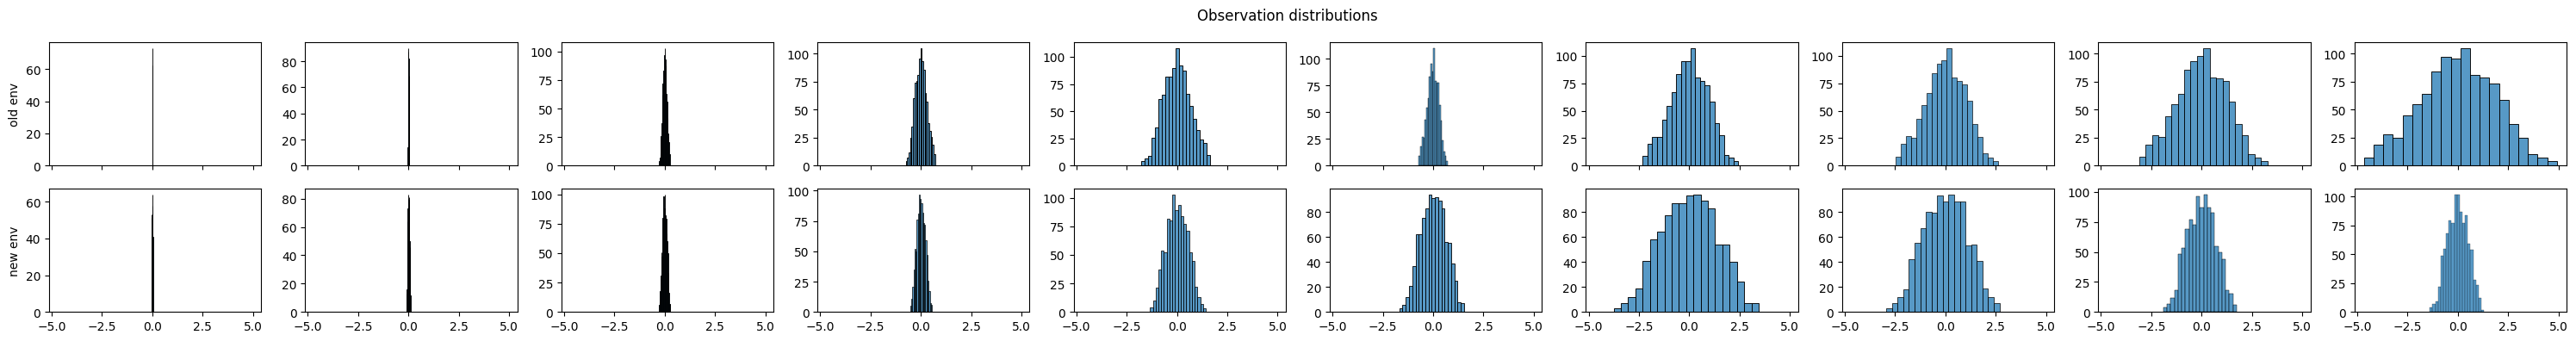

In [22]:
old_env_observations = []
new_env_observations = []
for _ in range(1_000):
    old_env_observations.append(old_env.reset()[0])
    new_env_observations.append(wrapped_new_env.reset()[0])

old_env_observations = np.array(old_env_observations)
new_env_observations = np.array(new_env_observations)

fig, axs = plt.subplots(2, 10, figsize=(30, 4), sharex=True)
for i in range(10):
    sns.histplot(old_env_observations[:, i], ax=axs[0, i], bins=20)
    sns.histplot(new_env_observations[:, i], ax=axs[1, i], bins=20)
    axs[0, i].set_ylabel(None)
    axs[1, i].set_ylabel(None)
axs[0, 0].set_ylabel("old env")
axs[1, 0].set_ylabel("new env")
fig.suptitle("Observation distributions")
plt.tight_layout()
plt.show()

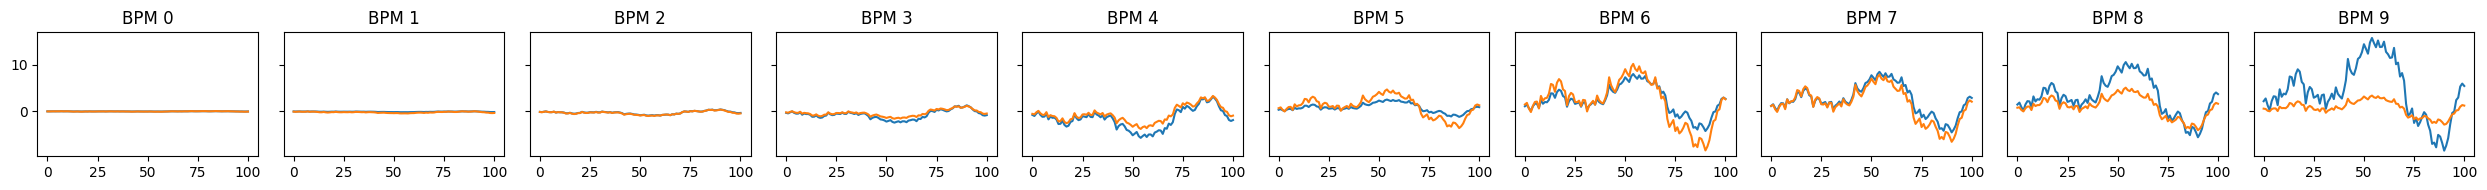

In [23]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = old_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
plt.tight_layout()
plt.show()

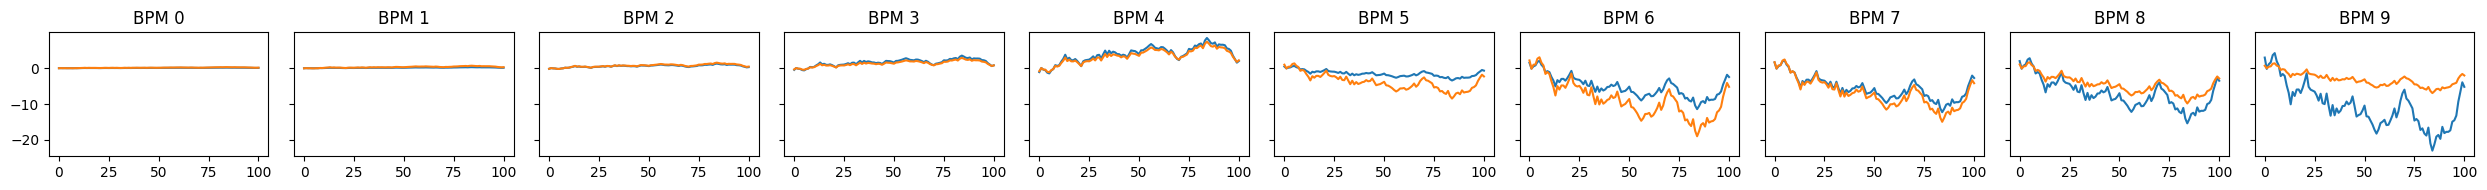

In [24]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = wrapped_new_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
plt.tight_layout()
plt.show()